# Business Understanding

## Project Domain

Domain: Finance & Security

Sub-Domain: Fraud Detection & Currency Authentication Systems

Banknote Authentication System termasuk dalam bidang keamanan finansial yang memanfaatkan teknologi machine learning untuk membantu otoritas keuangan, bank, atau lembaga terkait dalam membedakan uang asli dan palsu secara otomatis. Sistem ini menggunakan data citra dan karakteristik statistik dari uang kertas, seperti varians, simetri, entropi, dan lainnya, untuk mendeteksi keaslian dengan akurasi tinggi. Dengan pendekatan ini, proses validasi uang kertas dapat dilakukan secara real-time, efisien, dan mengurangi potensi peredaran uang palsu di masyarakat.

## Problem Statements

Masalah yang Dihadapi:
1. Peredaran Uang Palsu yang Sulit Dideteksi Secara Manual
Bank dan pedagang seringkali kesulitan membedakan uang asli dan palsu secara visual, terutama jika kualitas uang palsu sangat tinggi. Ketergantungan pada pemeriksaan manual memperlambat proses transaksi dan meningkatkan risiko kerugian.

2. Ketergantungan pada Perangkat Khusus Deteksi Uang Palsu
Banyak sistem autentikasi uang kertas membutuhkan mesin khusus (seperti UV detector atau mesin sortir), yang harganya mahal dan tidak selalu tersedia di lokasi transaksi seperti pasar tradisional atau UMKM.

3. Kurangnya Otomatisasi dalam Sistem Perbankan dan Ritel
Minimnya integrasi sistem cerdas untuk deteksi uang palsu dalam alur kerja perbankan dan ritel menyebabkan potensi penyebaran uang palsu yang tidak terdeteksi, serta meningkatnya biaya keamanan.

4. Ancaman terhadap Kepercayaan Publik Terhadap Sistem Keuangan
Maraknya uang palsu dapat menurunkan tingkat kepercayaan masyarakat terhadap mata uang dan sistem keuangan, khususnya di negara-negara berkembang yang memiliki pengawasan distribusi uang yang terbatas.

## Goals

Membangun sistem berbasis AI (Artificial Neural Network) yang dapat mengautentikasi uang kertas berdasarkan parameter:
* Variance dari transformasi wavelet citra uang

* Skewness (kemencengan distribusi intensitas piksel)

* Curtosis (keruncingan distribusi piksel)

* Entropy (tingkat ketidakteraturan atau kompleksitas citra)

## Solustion Statements

* Machine Learning Model
Menggunakan Artificial Neural Network (ANN) untuk klasifikasi keaslian uang berdasarkan parameter statistik dari citra uang kertas (variance, skewness, curtosis, entropy).
Model dilatih untuk membedakan uang asli dan palsu dengan akurasi tinggi (>90%), mendukung deteksi otomatis tanpa perlu inspeksi manual atau alat khusus.

* Aplikasi Web (Streamlit)
Menyediakan antarmuka sederhana berbasis web bagi pengguna seperti petugas bank, pedagang, atau kasir untuk memasukkan data karakteristik uang kertas dan langsung mendapatkan hasil prediksi keaslian.
Desain antarmuka memprioritaskan kemudahan penggunaan dan akses cepat di berbagai perangkat.

* Optimasi dengan TensorFlow Lite
Model ANN dikonversi ke format TFLite agar dapat dijalankan di perangkat edge seperti mobile, tablet, atau mesin kasir low-power, tanpa memerlukan koneksi internet atau server eksternal.
Solusi ini memperluas jangkauan deteksi uang palsu ke area pedesaan atau pasar tradisional dengan keterbatasan infrastruktur teknologi.

# Data Understanding

## Import Data dari Kaggle

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"dwirama21","key":"2e49dcc7cf403e23ebf9a32a44f7d021"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [5]:
!kaggle datasets download -d shantanuss/banknote-authentication-uci

Dataset URL: https://www.kaggle.com/datasets/shantanuss/banknote-authentication-uci
License(s): CC0-1.0
  0% 0.00/19.2k [00:00<?, ?B/s]
100% 19.2k/19.2k [00:00<00:00, 44.8MB/s]


In [6]:
!mkdir banknote-authentication-uci
!unzip banknote-authentication-uci.zip -d banknote-authentication-uci
!ls banknote-authentication-uci

Archive:  banknote-authentication-uci.zip
  inflating: banknote-authentication-uci/BankNoteAuthentication.csv  
BankNoteAuthentication.csv


## Import Library yang dibutuhkan

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report

## Exploratory Data Analysis

In [8]:
df = pd.read_csv('/content/banknote-authentication-uci.zip')

In [9]:
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


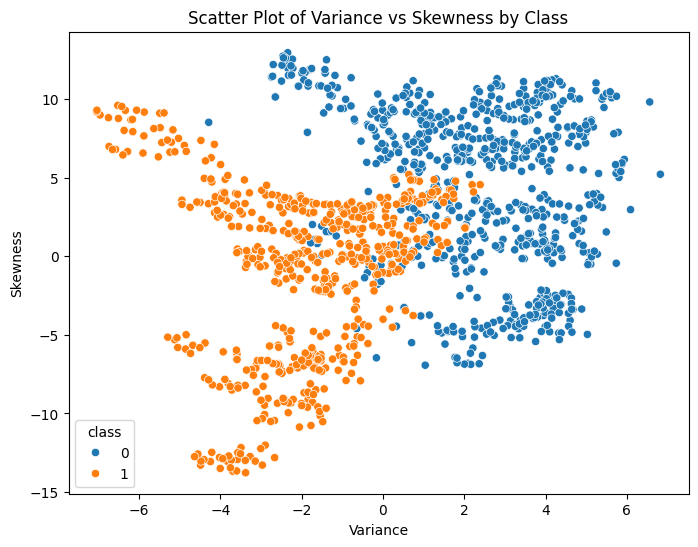

In [33]:
# Scatter Plot: Variance vs Skewness by Class
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='variance', y='skewness', hue='class')
plt.title('Scatter Plot of Variance vs Skewness by Class')
plt.xlabel('Variance')
plt.ylabel('Skewness')
plt.show()

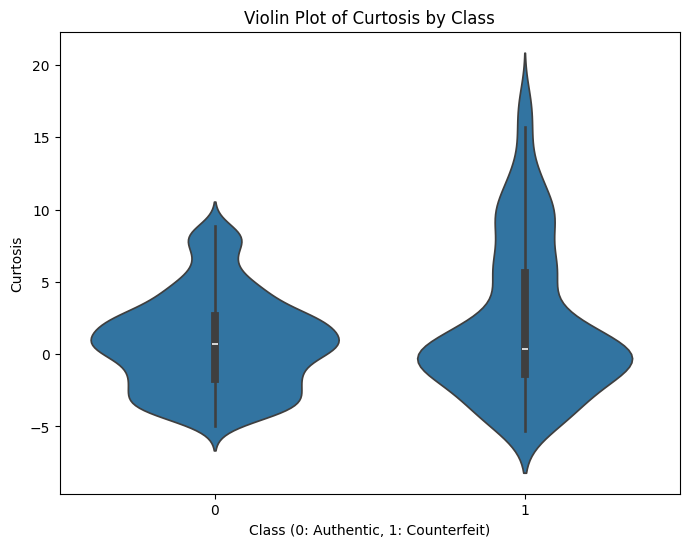

In [40]:
# Violin Plot for Curtosis by Class
plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x='class', y='curtosis')
plt.title('Violin Plot of Curtosis by Class')
plt.xlabel('Class (0: Authentic, 1: Counterfeit)')
plt.ylabel('Curtosis')
plt.show()

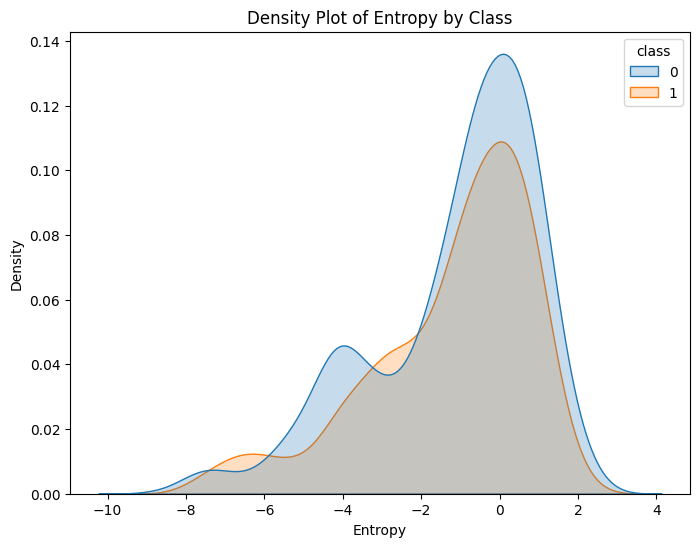

In [39]:
# Density Plot (KDE) for Entropy by Class
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df, x='entropy', hue='class', fill=True)
plt.title('Density Plot of Entropy by Class')
plt.xlabel('Entropy')
plt.ylabel('Density')
plt.show()

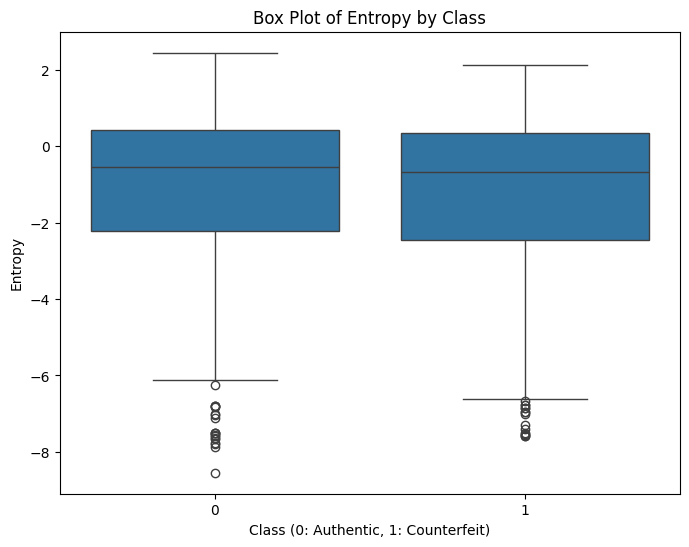

In [36]:
# Box Plot for Entropy by Class
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='class', y='entropy')
plt.title('Box Plot of Entropy by Class')
plt.xlabel('Class (0: Authentic, 1: Counterfeit)')
plt.ylabel('Entropy')
plt.show()

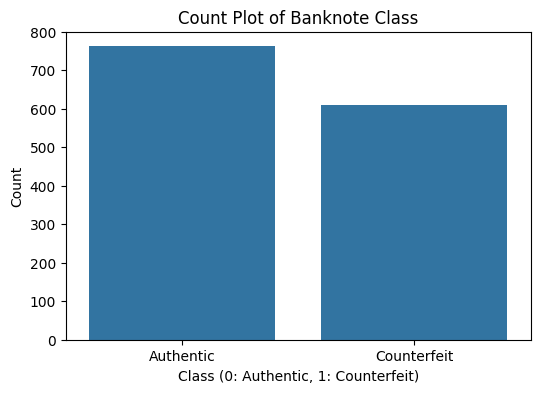

In [38]:
# Count Plot for the 'class' column
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='class')
plt.title('Count Plot of Banknote Class')
plt.xlabel('Class (0: Authentic, 1: Counterfeit)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Authentic', 'Counterfeit'])
plt.show()

# Data Preparation

In [11]:
# pisahkan fitur dan target
X = df.drop(columns=["class"])
y = df["class"]

In [12]:
# Encode label target
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [13]:
# Normalisasi fitur
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
# Bagi data menjadi train dan test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled,
                                                    y_encoded,
                                                    test_size=0.2,
                                                    random_state=42)

# Modeling

In [15]:
model = keras.Sequential([
    keras.Input(shape=(X_train.shape[1],)),
    layers.Dense(128, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(len(le.classes_), activation="softmax")
])

In [16]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,042 (43.13 KB)

 Trainable params: 11,042 (43.13 KB)

 Non-trainable params: 0 (0.00 B)

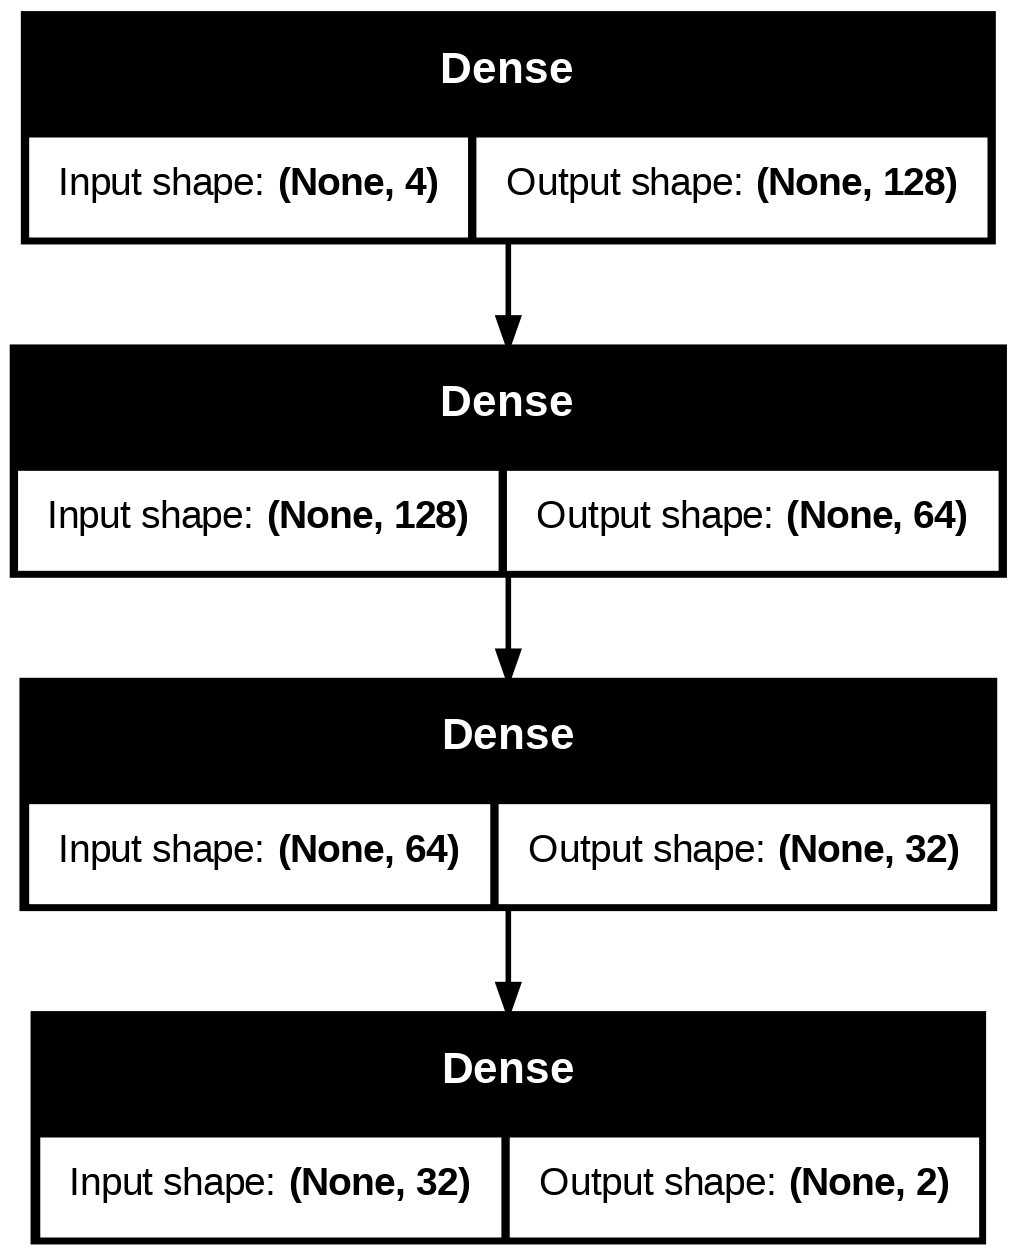

In [18]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes = True)

In [19]:
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=16,
                    validation_data=(X_test, y_test))

Epoch 1/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5867 - loss: 0.6358 - val_accuracy: 0.7927 - val_loss: 0.5319
Epoch 2/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8407 - loss: 0.4583 - val_accuracy: 0.8655 - val_loss: 0.3655
Epoch 3/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9108 - loss: 0.2745 - val_accuracy: 0.9309 - val_loss: 0.2069
Epoch 4/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9665 - loss: 0.1285 - val_accuracy: 0.9745 - val_loss: 0.1078
Epoch 5/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9822 - loss: 0.0773 - val_accuracy: 0.9891 - val_loss: 0.0705
Epoch 6/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9865 - loss: 0.0607 - val_accuracy: 0.9782 - val_loss: 0.0450
Epoch 7/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9903 - loss: 0.0379 - val_accuracy: 0.9891 - val_loss: 0.0349
Epoch 8/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9840 - loss: 0.0471 - val_accuracy: 0.9891 - val_loss:

# Evaluation

In [20]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Akurasi Model: {test_accuracy:.4f}")
print(f"Loss Model: {test_loss:.4f}")

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 3.7271e-04 
Akurasi Model: 1.0000
Loss Model: 0.0004


In [21]:
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

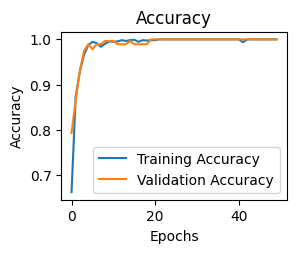

In [22]:
plt.subplot(2, 2, 4)
plt.plot(history.history["accuracy"], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

plt.show()

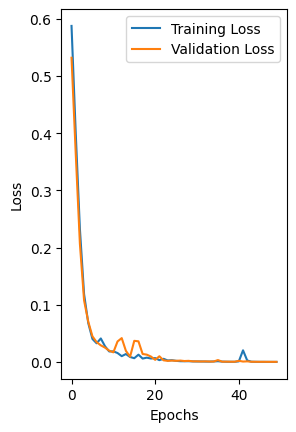

In [23]:
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


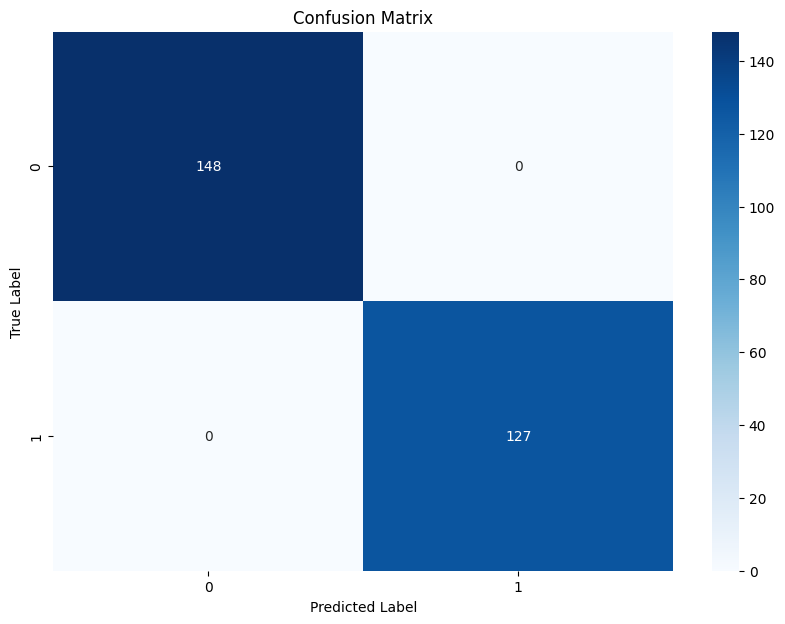

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       148
           1       1.00      1.00      1.00       127

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



In [24]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:")
print(classification_report(y_test, y_pred_classes))

# Deployment

## Model Simulation

In [25]:
sample_input = np.array([[-4.8392,6.6755,-0.24278,-6.5775]])
sample_input_df = pd.DataFrame(sample_input)

In [26]:
sample_input_scaled = scaler.transform(sample_input_df)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [28]:
predicted_class = np.argmax(model.predict(sample_input_scaled))
predicted_crop = le.inverse_transform([predicted_class])

print(f"Prediksi Banknote: {predicted_crop[0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
Prediksi Banknote: 1


## Save Model

In [29]:
# Konversi model ke TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Simpan model
with open('banknote.tflite', 'wb') as f:
    f.write(tflite_model)

Saved artifact at '/tmp/tmp3xf3cs8y'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 4), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 2), dtype=tf.float32, name=None)
Captures:
  133280808468304: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133280808467152: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133280802587472: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133280802588624: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133280808466768: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133280802587088: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133280802589200: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133280802588816: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [30]:
# Simpan label encoder dan scaler
import joblib
joblib.dump(le, 'label_encoder.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']